In [ ]:
FICHIER LANCE AVEC NOUVEL BASE CLEAN ET LABELISATION BINAIRE

#### IL FAUT FAIRE UN AUTRE CODE DE NETTOYAGE AVANT AFIN DE SUPPRIME LES VALEUR VIDE, NUL, ET NON FRANCAISE 

# EXPLORATION DES DONNEES

In [2]:
import csv
import pandas as pd 
import numpy as np

df_ini = pd.read_csv('all_reviews_fr_clean.csv',sep=';')
#df_ini.info()


In [3]:
df_ini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219428 entries, 0 to 219427
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   restau_ID    219428 non-null  int64  
 1   Titre        219428 non-null  object 
 2   Note         219428 non-null  float64
 3   Commentaire  219428 non-null  object 
 4   DateVisite   219428 non-null  object 
 5   restaurant   219428 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.0+ MB


## Taille du dataSet

In [4]:
df_ini.shape

(219428, 6)

Text(0.5, 1.0, 'Proportion en fonction des notes')

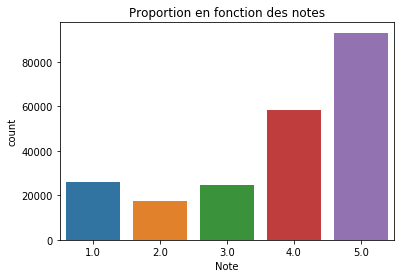

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

p = sns.countplot(data=df_ini, x = 'Note')
plt.title('Proportion en fonction des notes')

In [6]:
def labeliser_1(note):
    if note==3:
        return 0
    elif note==3.5:
        return 0
    elif note>3.5:
        return 1
    elif  note<3:
        return -1

# Proportion des commentaires par categorie

Text(0.5, 1.0, 'Proportion en fonction des catageories')

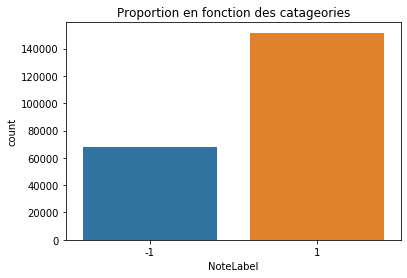

In [7]:


def labeliser_2(note):
    if note==3:
        return -1
    elif note==4:
        return 0
    elif note==3.5:
        return 0
    elif note>4:
        return 1
    elif  note<3:
        return -1
    
    

def labeliser_binaire(note):
    if note<=3:
        return -1
    elif note>3:
        return 1


notes_labelisees = []
for i in range(0,len(df_ini)):
    notes_labelisees.append(labeliser_binaire(df_ini['Note'][i]))
    
   
data = {'Titre':df_ini['Titre'],
        'NoteLabel':notes_labelisees,
        'DateVisite':df_ini['DateVisite'],
        'Commentaire':df_ini['Commentaire'],
        'restaurant':df_ini['restaurant']}

df = pd.DataFrame(data,columns =[ 'Titre', 'NoteLabel', 'DateVisite' , 'Commentaire','restaurant'] )



p = sns.countplot(data=df, x = 'NoteLabel')
plt.title('Proportion en fonction des catageories')


In [8]:
total = df.shape[0]
pourcentage_pos = (df.loc[df['NoteLabel'] == 1].shape[0]/total )
pourcentage_neg = (df.loc[df['NoteLabel'] == -1].shape[0]/total)
print("PROPORTION DE COMMENTAIRE LABEL")
print("Positif:")
print(pourcentage_pos)
print("Negatif:")
print(pourcentage_neg)

PROPORTION DE COMMENTAIRE LABEL
Positif:
0.6908325282097089
Negatif:
0.30916747179029114


# Distribution temporel du nombre d'avis par categorie

In [9]:

import datetime
from time import gmtime, strftime


dates = [] 
#date='janvier 2020'
d=''
for date in df['DateVisite']:
    try:
        d = date.replace('-',' 20').replace('janv', '01').replace('févr', '02').replace('mars', '03').replace('avr','04').replace('mai','05').replace('juin','06').replace('juil','07').replace('août','08').replace('sept','09').replace('oct','10').replace('nov','11').replace('déc','12')
        dates.append(datetime.datetime.strptime(d,'%m %Y').date())
    except ValueError:
        dates.append(datetime.datetime.strptime('01 2020','%m %Y').date())
        print('oups')
   
data_sorted_by_date = {'NoteLabel':notes_labelisees,'DateVisite':dates}

df_sorted_by_date = pd.DataFrame(data_sorted_by_date,columns =[ 'NoteLabel', 'DateVisite' ] )





oups
oups
oups


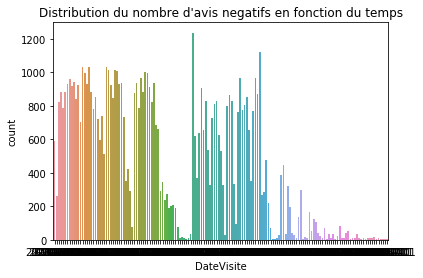

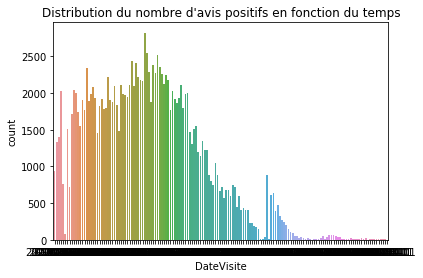

'\nplt.figure()\nsns.countplot(data=df_neu, x = \'DateVisite\')\nplt.title("Distribution du nombre d\'avis neutres en fonction du temps")\nplt.show()\n'

In [10]:


df_pos = df_sorted_by_date.loc[df_sorted_by_date['NoteLabel'] == 1]
df_neg = df_sorted_by_date.loc[df_sorted_by_date['NoteLabel'] == -1]
#df_neu = df_sorted_by_date.loc[df_sorted_by_date['NoteLabel'] == 0]


plt.figure()
sns.countplot(data=df_neg, x = 'DateVisite')
plt.title("Distribution du nombre d'avis negatifs en fonction du temps")
plt.show()

plt.figure()
sns.countplot(data=df_pos, x = 'DateVisite')
plt.title("Distribution du nombre d'avis positifs en fonction du temps")
plt.show()
"""
plt.figure()
sns.countplot(data=df_neu, x = 'DateVisite')
plt.title("Distribution du nombre d'avis neutres en fonction du temps")
plt.show()
"""


# Distribution des notes en fonction du mois 

fÃ©vrier 2016
dÃ©cembre 2015
y a


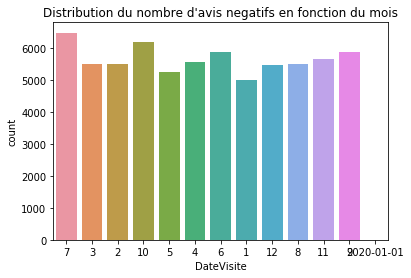

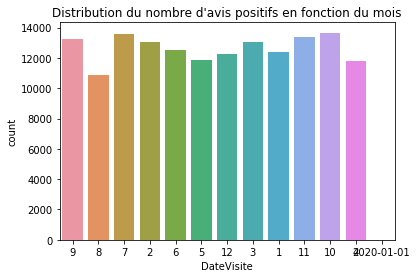

'\nplt.figure()\nsns.countplot(data=df_neu, x = \'DateVisite\')\nplt.title("Distribution du nombre d\'avis neutres en fonction du mois")\nplt.show()\n'

In [11]:

#GROUP BY MOIS


dates = [] 
#date='janvier 2020'
d=''
for date in df['DateVisite']:
    try:
        d = date.replace('-',' 20').replace('janv', '01').replace('févr', '02').replace('mars', '03').replace('avr','04').replace('mai','05').replace('juin','06').replace('juil','07').replace('août','08').replace('sept','09').replace('oct','10').replace('nov','11').replace('déc','12')
        dates.append(datetime.datetime.strptime(d, '%m %Y').date().month)
    except ValueError:
        dates.append(datetime.datetime.strptime('01 2020','%m %Y').date())
        print(date)
        
data_sorted_by_month = {'NoteLabel':notes_labelisees,'DateVisite':dates}

df_sorted_by_month = pd.DataFrame(data_sorted_by_month,columns =[ 'NoteLabel', 'DateVisite' ] )


df_pos = df_sorted_by_month.loc[df_sorted_by_month['NoteLabel'] == 1]
df_neg = df_sorted_by_month.loc[df_sorted_by_month['NoteLabel'] == -1]
#df_neu = df_sorted_by_month.loc[df_sorted_by_month['NoteLabel'] == 0]



plt.figure()
sns.countplot(data=df_neg, x = 'DateVisite')
plt.title("Distribution du nombre d'avis negatifs en fonction du mois")
plt.show()

plt.figure()
sns.countplot(data=df_pos, x = 'DateVisite')
plt.title("Distribution du nombre d'avis positifs en fonction du mois")
plt.show()

"""
plt.figure()
sns.countplot(data=df_neu, x = 'DateVisite')
plt.title("Distribution du nombre d'avis neutres en fonction du mois")
plt.show()
"""



# Relation Longueur commentaire et note 

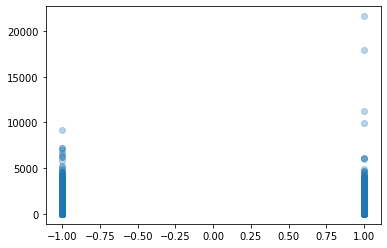

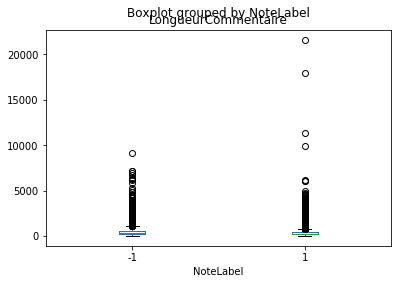

In [12]:

#LONGUEUR DE COMMETAIRE ET OPINION
longueurs = []
for review in df['Commentaire']:
    longueurs.append(len(review))
   

label = df['NoteLabel']


plt.scatter(label,longueurs,alpha=0.3)
     
   
#plt.scatter(df_pos.mean()[0],df_pos.mean()[1],color='green')


data_longueur = {'NoteLabel':label,'LongueurCommentaire':longueurs}

df_longueur = pd.DataFrame(data_longueur,columns =[ 'NoteLabel', 'LongueurCommentaire' ] )




df_pos = df_longueur.loc[df_longueur['NoteLabel'] == 1]
df_neg = df_longueur.loc[df_longueur['NoteLabel'] == -1]
df_neu = df_longueur.loc[df_longueur['NoteLabel'] == 0]

df_longueur.boxplot(by ='NoteLabel', column =['LongueurCommentaire'], grid = False) 



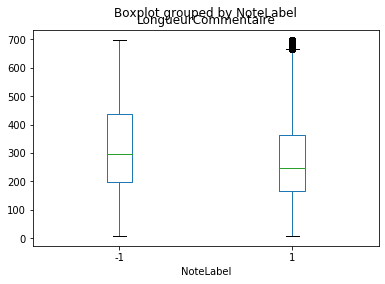

In [15]:
df_valeurs_centrees = df_longueur.loc[df_longueur['LongueurCommentaire'] <700]
df_valeurs_centrees.boxplot(by ='NoteLabel', column =['LongueurCommentaire'], grid = False)

In [12]:
df_pos.describe()

,NoteLabel,LongueurCommentaire
count,93241.0,93241.000000
mean,1.0,334.909139
std,0.0,278.654252
min,1.0,8.000000
25%,1.0,170.000000
50%,1.0,261.000000
75%,1.0,410.000000
max,1.0,21603.000000


In [43]:
df_neg.describe()

,NoteLabel,LongueurCommentaire
count,67840.0,67840.000000
mean,-1.0,451.846993
std,0.0,373.749651
min,-1.0,8.000000
25%,-1.0,216.000000
50%,-1.0,345.000000
75%,-1.0,560.000000
max,-1.0,9145.000000


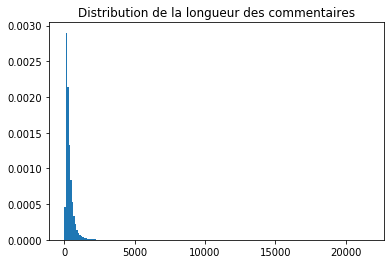

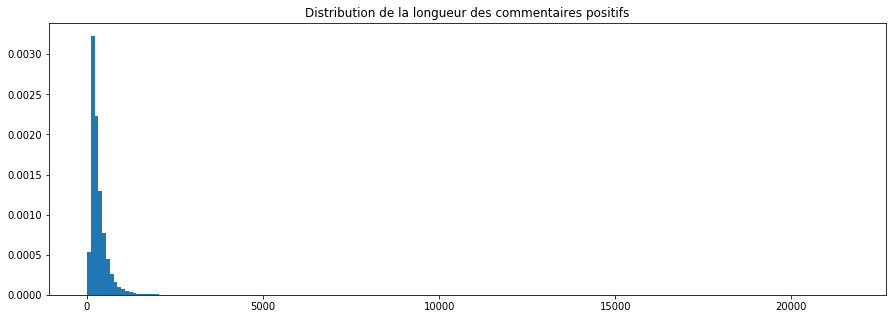

count    151588.000000
mean        332.365339
std         268.040591
min           8.000000
25%         171.000000
50%         260.000000
75%         406.000000
max       21603.000000
Name: LongueurCommentaire, dtype: float64


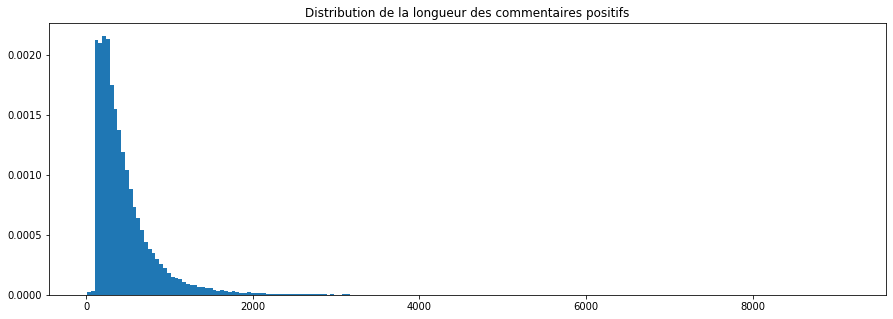

count    67840.000000
mean       451.846993
std        373.749651
min          8.000000
25%        216.000000
50%        345.000000
75%        560.000000
max       9145.000000
Name: LongueurCommentaire, dtype: float64


'\nplt.figure(figsize=(15,5))\nplt.hist(df_neu.LongueurCommentaire, bins=200, density=True)\nplt.show()\n\nprint(df_neu.LongueurCommentaire.describe())\n'

In [48]:

#LONGUEUR DE COMMETAIRE ET OPINION


plt.figure()
plt.hist(longueurs, bins=200, density=True)
plt.title("Distribution de la longueur des commentaires")
plt.show()



plt.figure(figsize=(15,5))
plt.hist(df_pos.LongueurCommentaire, bins=200, density=True)
plt.title("Distribution de la longueur des commentaires positifs")
plt.show()
print(df_pos.LongueurCommentaire.describe())

plt.figure(figsize=(15,5))
plt.hist(df_neg.LongueurCommentaire, bins=200, density=True)
plt.title("Distribution de la longueur des commentaires positifs")
plt.show()
print(df_neg.LongueurCommentaire.describe())


"""
plt.figure(figsize=(15,5))
plt.hist(df_neu.LongueurCommentaire, bins=200, density=True)
plt.show()

print(df_neu.LongueurCommentaire.describe())
"""


Interpretation : 
taille(Commentaire positif) < taille(Commentaire negatif) <  taille(Commentaire Neutre)
Cependant en tenant compte de la distribution, il semble compliqué d'y voir une correlation entre la longueur du commentaire et sa note.
    
    


# Matrice de correlation

In [69]:
i = 0
for mois in df['Mois']:
    if type(mois)!=int:
        df['Mois'][i]=df['Mois'][i-1]
    i=i+1
print(df['Mois'][18792])

9


In [71]:
for mois in df['Mois']:
    if type(mois)!=int:
        print(mois)
    i=i+1
print(df['Mois'][18792])


9


"\ndata_corr = {'NoteLabel':df['NoteLabel'],'Mois':df['Mois'],'Longueur':df['Longueur']}\n\n#data_corr = {'NoteLabel':df['NoteLabel'],'Longueur':df['Longueur']}\n\ndf_corr = pd.DataFrame(data_corr,columns =[ 'NoteLabel', 'Mois' , 'Longueur'] )\n#df_corr = pd.DataFrame(data_corr,columns =[ 'NoteLabel', 'Longueur'] )\n\nZ = sc.fit_transform(df_corr)\ndf_corr2 = pd.DataFrame(Z,columns =[ 'NoteLabel', 'Mois' , 'Longueur'] )\n#df_corr2 = pd.DataFrame(Z,columns =[ 'NoteLabel', 'Longueur'] )\nplt.figure()\nsns.heatmap(df_corr2.corr(), annot=True, cmap='Greens')\n"

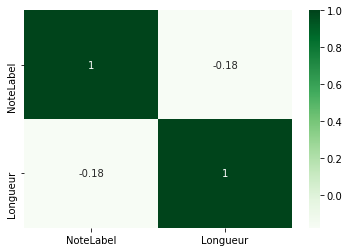

In [79]:

#TRACER MATRICE DE CORRRELATION

import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


df['Longueur'] = longueurs
df['Mois'] = dates

sns.heatmap(df.corr(), annot=True, cmap='Greens')


"""
data_corr = {'NoteLabel':df['NoteLabel'],'Mois':df['Mois'],'Longueur':df['Longueur']}

#data_corr = {'NoteLabel':df['NoteLabel'],'Longueur':df['Longueur']}

df_corr = pd.DataFrame(data_corr,columns =[ 'NoteLabel', 'Mois' , 'Longueur'] )
#df_corr = pd.DataFrame(data_corr,columns =[ 'NoteLabel', 'Longueur'] )

Z = sc.fit_transform(df_corr)
df_corr2 = pd.DataFrame(Z,columns =[ 'NoteLabel', 'Mois' , 'Longueur'] )
#df_corr2 = pd.DataFrame(Z,columns =[ 'NoteLabel', 'Longueur'] )
plt.figure()
sns.heatmap(df_corr2.corr(), annot=True, cmap='Greens')
"""


Chelou
Pb de code (venant de nous) ou pas de correlation ??
n'y a t il vraiment pas de correlation entre longueur et note ??


pas vraiment de correlation directe
si c neg -> tendance tres long

8